<a href="https://colab.research.google.com/github/pcsilcan/da/blob/master/11_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pyfim

     |████████████████████████████████| 358kB 8.6MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp36-cp36m-linux_x86_64.whl size=536912 sha256=371de1cacbb2a89a0bdedbd8c46a8df86c45c4ef49765b8bb34b49ad0bbb3009
  Stored in directory: /root/.cache/pip/wheels/19/ac/b4/9ae8ceb2208d78b21b1157f8561cc4469d236b7d785e7422f1
Successfully built pyfim


In [0]:
dataset = []
dataset1 = []
with open('zoo.bin', 'r') as file:
    for x in file:
        if '#' not in x:
            items = x.split(' ')
            dataset.append([int(j) for j in items[1:]])
            if items[0] == '1':
                dataset1.append([int(j) for j in items[1:]])

In [0]:
from fim import *
out = fpgrowth(dataset, target='a', supp=40, zmin=2, report='a')

In [0]:
#help(fpgrowth)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import time
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def emergingPattern(d, d1, minsupp, mingr):
    allitemsets = eclat(d, target='a', supp=-minsupp)
    if len(allitemsets) > 0:
        allitemsets1 = eclat(d1, target='a', supp=-minsupp)
        df = pd.DataFrame(allitemsets)
        df.columns = ["Pattern", "Freq"]
        df1 = pd.DataFrame(allitemsets1)
        df1.columns = ["Pattern", "Freq1"]
        emerging = df.join(df1.set_index('Pattern'), on='Pattern').fillna(0)
        emerging["Gr"] = ((len(d) - len(d1)) * emerging["Freq1"]) / (len(d1) * (emerging["Freq"] - emerging["Freq1"]))
        emerging = emerging[emerging.Gr >= mingr]
        jep = emerging[emerging.Freq == emerging.Freq1]
        return True,emerging,jep
    return False,_,_

In [0]:
def plotEmergingPatterns(v, em):
    numberdata = []
    if v:
        for i in range(0, 61, 5):
            em_ = em[em.Gr >= i]
            numberdata.append((i, len(em_), 0))
    df = pd.DataFrame(numberdata)
    df.columns = ['Growth-rate', '#Itemsets', 'TimeEmergingItemsets']
    sns.lineplot(x='Growth-rate', y='#Itemsets', data=df)
    return df

,Growth-rate,#Itemsets,TimeEmergingItemsets
0,0,2301,0
1,5,1860,0
2,10,1664,0
3,15,1606,0
4,20,1576,0
5,25,1555,0
6,30,1535,0
7,35,1509,0
8,40,1477,0
9,45,1468,0


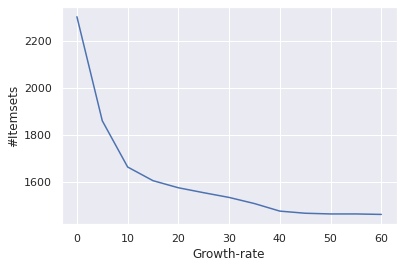

In [0]:
val, em, jep = emergingPattern(dataset, dataset1, -1, 1)
plotEmergingPatterns(val, em)

In [0]:
jep

,Pattern,Freq,Freq1,Gr
35921,"(20, 23, 18)",19,19.0,inf
40381,"(43, 23, 27, 16)",31,31.0,inf
40384,"(43, 23, 27, 28)",31,31.0,inf
40385,"(43, 23, 27)",31,31.0,inf
41109,"(43, 18, 23, 30)",26,26.0,inf
...,...,...,...,...
952049,"(41, 21, 15)",2,2.0,inf
952050,"(41, 21, 12, 43)",2,2.0,inf
952051,"(41, 21, 12)",2,2.0,inf
952052,"(41, 21, 43)",2,2.0,inf
